Mounting Google Drive For Data Access

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Creating Data Generator for Data Augmentation

In [ ]:
import tensorflow as tf 
from keras.applications.resnet50 import preprocess_input

datagen = tf.keras.preprocessing.image.ImageDataGenerator( 
                                                          rescale = 1./255., 
                                                          rotation_range = 8, 
                                                          width_shift_range = 0.2, 
                                                          height_shift_range = 0.2,
                                                          shear_range = 0.2, 
                                                          zoom_range = 0.2,
                                                          brightness_range = [0.5,1.5],
                                                          horizontal_flip = True,
                                                          fill_mode = 'nearest',
                                                          dtype = None,                                                      
                                                          validation_split = 0.15)


Validation and Training Sets

In [ ]:
dire = '/content/gdrive/MyDrive/Infections'

train_generator = datagen.flow_from_directory(
    dire,
    subset="training",
    batch_size=32,
    class_mode='categorical',     
    shuffle=True,                      
    target_size=(150,150)
)

valid_generator = datagen.flow_from_directory(
    dire,
    subset="validation",
    shuffle=True,
    batch_size=32,
    class_mode='categorical',                           
    target_size=(150,150)
)

Found 673 images belonging to 5 classes.
Found 116 images belonging to 5 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 150, 150, 3), (32, 5))

Extracting and Saving Labels

In [ ]:
label_batch[0:5]
print(train_generator.class_indices)
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f:
 f.write(labels)
!cat labels.txt

{'Blepharitis': 0, 'Cellulitis eye': 1, 'Conjunctivitis, Pink Eye': 2, 'Eye': 3, 'Hordeolum, stye': 4}
Blepharitis
Cellulitis eye
Conjunctivitis, Pink Eye
Eye
Hordeolum, stye

In [ ]:
import os
import urllib.request

#urllib.request.urlretrieve('https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                           #'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

os.listdir()



['.config', 'gdrive', 'labels.txt', 'sample_data']

Initializing Mobile Net V2 Pre-trained Model

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from keras.applications.vgg16 import VGG16 
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras import layers 
from tensorflow.keras import Model 

from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import MobileNetV2

mobileNet = MobileNetV2(
    input_shape = (150,150,3), 
    weights = 'imagenet', 
    include_top = False,
)





Freezing Layers in Mobile Net V2 Model

In [ ]:
for layer in mobileNet.layers:
    layer.trainable = False

Creating Custom Architecture on Top of MobileNetV2

In [ ]:
from keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers


model = Sequential()


## Inception V3
model.add(mobileNet)
model.add(Flatten())
#model.add(GlobalAveragePooling2D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(5, activation = 'softmax'))

Adjusting Adam Optimizer and Compiling Model

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1024032   
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 165       
Total params: 3,282,181
Trainable params: 1,024,197
Non-trainable params: 2,257,984
_________________________________________________________________


Training for 10 Epochs

In [ ]:
hist= model.fit(train_generator, validation_data = valid_generator, epochs = 10)

Epoch 1/10
22/22 [==============================] - 11s 380ms/step - loss: 2.7741 - accuracy: 0.2030 - val_loss: 1.9100 - val_accuracy: 0.1897
Epoch 2/10
22/22 [==============================] - 7s 328ms/step - loss: 1.9401 - accuracy: 0.2118 - val_loss: 1.6664 - val_accuracy: 0.2414
Epoch 3/10
22/22 [==============================] - 7s 327ms/step - loss: 1.6872 - accuracy: 0.2504 - val_loss: 1.5500 - val_accuracy: 0.3276
Epoch 4/10
22/22 [==============================] - 7s 327ms/step - loss: 1.6407 - accuracy: 0.2587 - val_loss: 1.5721 - val_accuracy: 0.3190
Epoch 5/10
22/22 [==============================] - 7s 329ms/step - loss: 1.6067 - accuracy: 0.2761 - val_loss: 1.5810 - val_accuracy: 0.3534
Epoch 6/10
22/22 [==============================] - 7s 330ms/step - loss: 1.5613 - accuracy: 0.3225 - val_loss: 1.5046 - val_accuracy: 0.3966
Epoch 7/10
22/22 [==============================] - 7s 327ms/step - loss: 1.5140 - accuracy: 0.3550 - val_loss: 1.4703 - val_accuracy: 0.4310
Epoch

Training for Additional 50 Epochs

In [ ]:
hist= model.fit(train_generator, validation_data = valid_generator, epochs = 50)

Epoch 1/50
22/22 [==============================] - 8s 350ms/step - loss: 1.4208 - accuracy: 0.4131 - val_loss: 1.4122 - val_accuracy: 0.4310
Epoch 2/50
22/22 [==============================] - 7s 334ms/step - loss: 1.4075 - accuracy: 0.4101 - val_loss: 1.3118 - val_accuracy: 0.4828
Epoch 3/50
22/22 [==============================] - 7s 332ms/step - loss: 1.3910 - accuracy: 0.4042 - val_loss: 1.3510 - val_accuracy: 0.4741
Epoch 4/50
22/22 [==============================] - 7s 329ms/step - loss: 1.4088 - accuracy: 0.4354 - val_loss: 1.3628 - val_accuracy: 0.4310
Epoch 5/50
22/22 [==============================] - 7s 326ms/step - loss: 1.3299 - accuracy: 0.4146 - val_loss: 1.2796 - val_accuracy: 0.5000
Epoch 6/50
22/22 [==============================] - 7s 328ms/step - loss: 1.3717 - accuracy: 0.4398 - val_loss: 1.2759 - val_accuracy: 0.5086
Epoch 7/50
22/22 [==============================] - 7s 324ms/step - loss: 1.3270 - accuracy: 0.4398 - val_loss: 1.2277 - val_accuracy: 0.5259
Epoch 

Unfreezing Layers in MobileNetV2, adjusting Optimizer and Compiling Model again to ensure that the model can be trained on custom dataset

In [ ]:
for layer in mobileNet.layers:
    layer.trainable = True

opt = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1024032   
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 165       
Total params: 3,282,181
Trainable params: 3,248,069
Non-trainable params: 34,112
_________________________________________________________________


Training unfreezed model for 50 Epochs

In [ ]:
hist= model.fit(train_generator, validation_data = valid_generator, epochs = 50)

Epoch 1/50
22/22 [==============================] - 13s 394ms/step - loss: 1.6983 - accuracy: 0.3298 - val_loss: 1.0477 - val_accuracy: 0.5776
Epoch 2/50
22/22 [==============================] - 8s 352ms/step - loss: 1.5530 - accuracy: 0.3757 - val_loss: 0.9314 - val_accuracy: 0.5862
Epoch 3/50
22/22 [==============================] - 8s 357ms/step - loss: 1.4065 - accuracy: 0.4089 - val_loss: 0.9928 - val_accuracy: 0.5690
Epoch 4/50
22/22 [==============================] - 8s 352ms/step - loss: 1.3786 - accuracy: 0.4607 - val_loss: 1.0624 - val_accuracy: 0.5690
Epoch 5/50
22/22 [==============================] - 8s 356ms/step - loss: 1.3420 - accuracy: 0.4203 - val_loss: 0.9820 - val_accuracy: 0.6034
Epoch 6/50
22/22 [==============================] - 8s 360ms/step - loss: 1.3281 - accuracy: 0.4628 - val_loss: 1.0229 - val_accuracy: 0.6207
Epoch 7/50
22/22 [==============================] - 8s 358ms/step - loss: 1.3957 - accuracy: 0.4070 - val_loss: 1.0468 - val_accuracy: 0.5948
Epoch

Adjusting Optimizer again for slower learning rate

In [ ]:
for layer in mobileNet.layers:
    layer.trainable = True

opt = tf.keras.optimizers.Adam(learning_rate=0.000001)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1024032   
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 165       
Total params: 3,282,181
Trainable params: 3,248,069
Non-trainable params: 34,112
_________________________________________________________________


Training on slower learning rate for fine tuning

In [ ]:
hist= model.fit(train_generator, validation_data = valid_generator, epochs = 50)

Epoch 1/50
22/22 [==============================] - 13s 411ms/step - loss: 0.9085 - accuracy: 0.6271 - val_loss: 0.8815 - val_accuracy: 0.6897
Epoch 2/50
22/22 [==============================] - 8s 358ms/step - loss: 0.9207 - accuracy: 0.6245 - val_loss: 0.8310 - val_accuracy: 0.6897
Epoch 3/50
22/22 [==============================] - 8s 359ms/step - loss: 0.9148 - accuracy: 0.6201 - val_loss: 0.9349 - val_accuracy: 0.6897
Epoch 4/50
22/22 [==============================] - 8s 355ms/step - loss: 0.9027 - accuracy: 0.6555 - val_loss: 0.8648 - val_accuracy: 0.6379
Epoch 5/50
22/22 [==============================] - 8s 352ms/step - loss: 0.9725 - accuracy: 0.5975 - val_loss: 0.8528 - val_accuracy: 0.6638
Epoch 6/50
22/22 [==============================] - 8s 369ms/step - loss: 0.9542 - accuracy: 0.6079 - val_loss: 0.8403 - val_accuracy: 0.6810
Epoch 7/50
22/22 [==============================] - 8s 370ms/step - loss: 0.9025 - accuracy: 0.6646 - val_loss: 0.8396 - val_accuracy: 0.6810
Epoch

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1024032   
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 165       
Total params: 3,282,181
Trainable params: 3,248,069
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
hist= model.fit(train_generator, validation_data = valid_generator, epochs = 50)

Epoch 1/50
22/22 [==============================] - 13s 420ms/step - loss: 0.1545 - accuracy: 0.9483 - val_loss: 1.1307 - val_accuracy: 0.7759
Epoch 2/50
22/22 [==============================] - 8s 340ms/step - loss: 0.1260 - accuracy: 0.9456 - val_loss: 0.7964 - val_accuracy: 0.8276
Epoch 3/50
22/22 [==============================] - 8s 364ms/step - loss: 0.1555 - accuracy: 0.9461 - val_loss: 1.1572 - val_accuracy: 0.8103
Epoch 4/50
22/22 [==============================] - 8s 356ms/step - loss: 0.1263 - accuracy: 0.9527 - val_loss: 0.9403 - val_accuracy: 0.8017
Epoch 5/50
22/22 [==============================] - 8s 371ms/step - loss: 0.2452 - accuracy: 0.9173 - val_loss: 0.9349 - val_accuracy: 0.7931
Epoch 6/50
22/22 [==============================] - 8s 360ms/step - loss: 0.1402 - accuracy: 0.9538 - val_loss: 0.9503 - val_accuracy: 0.7931
Epoch 7/50
22/22 [==============================] - 8s 363ms/step - loss: 0.1224 - accuracy: 0.9578 - val_loss: 1.2996 - val_accuracy: 0.7672
Epoch

Final Stats

In [ ]:
final_loss, final_accuracy = model.evaluate(valid_generator)
print("Final Validation loss: {:.2f}".format(final_loss))
print("Final Validation accuracy: {:.2f}%".format(final_accuracy * 100))

final_loss, final_accuracy = model.evaluate(train_generator)
print("Final training loss: {:.2f}".format(final_loss))
print("Final training accuracy: {:.2f}%".format(final_accuracy * 100))

4/4 [==============================] - 1s 305ms/step - loss: 0.7183 - accuracy: 0.8276
Final Validation loss: 0.72
Final Validation accuracy: 82.76%
22/22 [==============================] - 6s 273ms/step - loss: 0.0357 - accuracy: 0.9896
Final training loss: 0.04
Final training accuracy: 98.96%


Saving Model

In [ ]:
model.save('/content/gdrive/MyDrive/Infections/infection_model_v2.5.h5')

Prediction on Validation Set

In [ ]:
import numpy as np

val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 150, 150, 3)


In [ ]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Blepharitis' 'Cellulitis Eye' 'Conjunctivitis, Pink Eye' 'Eye'
 'Hordeolum, Stye']


In [ ]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)
print(tf_model_predictions)
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

Prediction results shape: (32, 5)
[[1.11890696e-02 5.54975748e-01 1.43679703e-04 1.91179069e-03
  4.31779683e-01]
 [5.09586253e-12 1.16555066e-09 2.99375031e-08 1.00000000e+00
  3.19376134e-08]
 [1.96978566e-12 1.00000000e+00 4.50140425e-10 1.91115635e-12
  1.31474067e-08]
 [3.32312938e-03 6.78713404e-05 8.47166521e-04 5.85179623e-05
  9.95703280e-01]
 [1.85604231e-03 2.04600915e-01 7.34460627e-05 1.27571897e-04
  7.93341994e-01]
 [7.11561415e-06 2.34162304e-04 1.58641109e-04 1.09614735e-03
  9.98503923e-01]
 [2.21225317e-04 1.14122686e-05 9.99663949e-01 4.21737823e-05
  6.12696313e-05]
 [9.85490680e-01 3.76331968e-06 1.44295339e-02 7.19598975e-05
  4.13697171e-06]
 [3.20747660e-13 1.00000000e+00 3.11273251e-13 4.70478564e-15
  6.36770974e-12]
 [9.86473083e-01 1.98478345e-03 9.55302501e-04 3.95063224e-04
  1.01917787e-02]
 [3.53542446e-21 1.32684179e-17 5.22400082e-14 1.00000000e+00
  6.40264595e-17]
 [6.90964271e-06 9.99968052e-01 1.66723312e-05 7.18181496e-08
  8.30196768e-06]
 [4.02

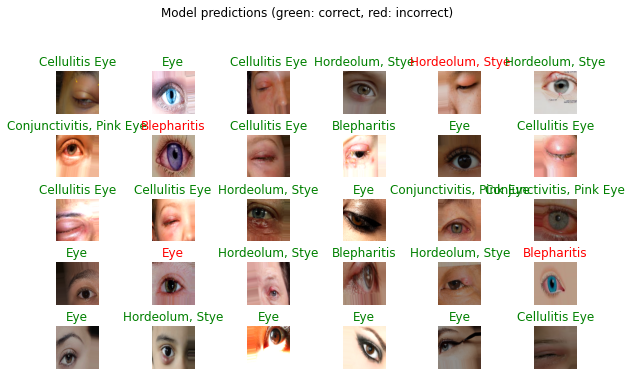

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
  plt.subplot(8,6,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

Testing Model

In [ ]:
from keras.preprocessing.image import load_img
 
image = load_img('/content/gdrive/MyDrive/Infections/Test Images/Cell.jpeg', target_size=(150,150))


In [ ]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)
#image = np.repeat(image, 3, 2)

In [ ]:
image = np.expand_dims(image,axis=0)
image = np.array(image)/255.0
print(image.shape)

(1, 150, 150, 3)


In [ ]:
pred = model.predict(image)
print(pred.shape)
print (pred)

(1, 5)
[[4.8816949e-03 9.6760726e-01 6.9175308e-05 6.9940317e-04 2.6742440e-02]]


In [ ]:
predicted_id = np.argmax(pred, axis=-1)
predicted_labels = dataset_labels[predicted_id]
print(predicted_labels)

['Cellulitis Eye']
